# Background
The objective of this project is to classify the overall sentiment of a tweet's context as neutral, negative, or positive using NLP classifiers. To complete, this project, we are given a dataset of 27,481 tweets, where 22,464 of those tweets were captured as having either a neutral, negative, or positive sentiment. Our goal is to use this training data of ~27.5k tweets to predict the sentiment of the 3,534 tweets in our testing data set.

## Import Libraries
Importing usual data analytics libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing text, pre-processing libraries:

In [2]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

Importing model-building libraries:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

Importing bag of words libraries:

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

Importing word embedding libraries:

In [5]:
import gensim
from gensim.models import Word2Vec

## Loading Dataset

In [6]:
train = pd.read_csv("/Users/bethelikejiofor/Documents/GitHub/ENTITY-Final-Project/Data/train.csv")
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Exploratory Data Analysis

### Sentiment Distribution
The dataset is slightly imbalanced. There are more neutral sentiment tweets (11,118) than there are positive (8,582) or negative (7,781). However, the imbalance is not too much that there needs to be a data-balancing technique introduced.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sentiment'>

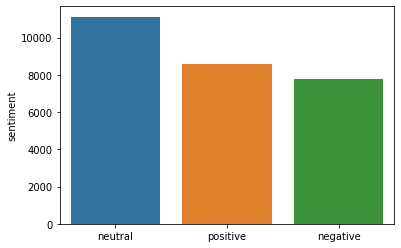

In [9]:
x = train['sentiment'].value_counts()
sns.barplot(x.index, x)

In [11]:
print(x)

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


### Missing Values
There is just 1 missing value in the text and selected_text columns. Assuming this is the same row, this row will be removed in the data wrangling step.

In [12]:
train.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64